# Anomaly detection - Credit card transactions - using Isolation Forest

In [201]:
# Import libraries

# Pandas for data frame
import pandas as pd

# For isolation forest model
from sklearn.ensemble import IsolationForest, RandomForestClassifier

# Numerical calculation
import numpy as np

# Default dictionary
from collections import defaultdict

# For metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# matplotlib for plots
import matplotlib.pyplot as plt

### Load train, dev and test data from previous notebook

In [202]:
# Import data
df_train = pd.read_csv('C:\\Myprojects\\Dev\\py3\\creditcard_train.csv')
df_dev = pd.read_csv('C:\\Myprojects\\Dev\\py3\\creditcard_dev.csv')
df_test = pd.read_csv('C:\\Myprojects\\Dev\\py3\\creditcard_test.csv')

In [203]:
# Concatenate train and dev for model fitting
df_traindev = pd.concat([df_train,df_dev])

In [204]:
# Columns for training
impcol = df_traindev.columns[2:31]
impcol

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Use Random forest classifier only to find the feature importance using entropy value

In [205]:
# Find feature importance using entropy value from Random Forest classifier
rnd_model = RandomForestClassifier(criterion='entropy',random_state=1)
rnd_model.fit(df_traindev[impcol],df_traindev['Class'])
impfeat = impcol[np.argsort(rnd_model.feature_importances_)][::-1]
impfeat

C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Index(['V17', 'V12', 'V16', 'V14', 'V3', 'V4', 'V10', 'V18', 'V5', 'V8', 'V9',
       'V11', 'V26', 'Amount', 'V15', 'V2', 'V6', 'V7', 'V19', 'V21', 'V1',
       'V24', 'V13', 'V28', 'V22', 'V20', 'V27', 'V25', 'V23'],
      dtype='object')

In [206]:
# Find the ourlier fraction in train-dev dataset
outlier_fraction = df_traindev[df_traindev.Class==1].shape[0]/df_traindev[df_traindev.Class==0].shape[0]

In [207]:
# Function to train and predict using Isolation forest model
def train_model(df,feat_list,label,model):
    model.fit(df[feat_list])
    pred = [0 if x == 1 else 1 for x in model.predict(df[feat_list])]    
    return(
          pred,
          f1_score(df[label],pred),
          recall_score(df[label],pred),
          precision_score(df[label],pred),
          accuracy_score(df[label],pred)
          )

### Training - Isolation Forest

In [208]:
# Search for number of features with best F1-score
_,f1,rec,prec,acc = defaultdict(int),defaultdict(int),defaultdict(int),defaultdict(int),defaultdict(int)
for i in range(29):
    iso_model = IsolationForest(contamination=outlier_fraction,random_state=1)
    _,f1[i+1],rec[i+1],prec[i+1],acc[i+1] = train_model(df_traindev,impfeat[:i+1],'Class',iso_model)


C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib

C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


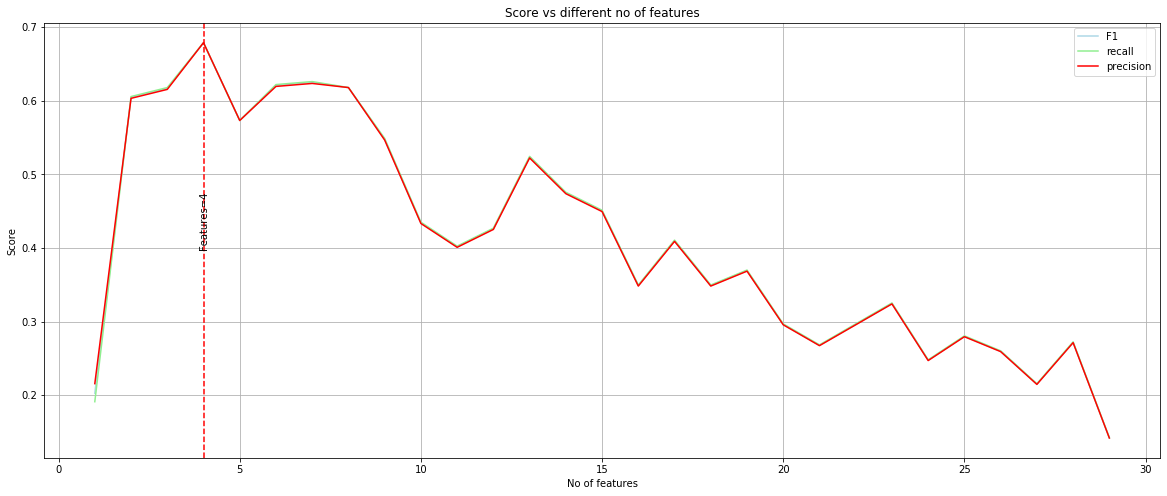

In [216]:
# Plot the results
plt.figure(figsize=(20,8))
x1 = [i+1 for i in range(29)]
y1 = [f1[i] for i in x1]
y2 = [rec[i] for i in x1]
y3 = [prec[i] for i in x1]
y4 = [acc[i] for i in x1]

plt.plot(x1,y1,label='F1',color='lightblue')
plt.plot(x1,y2,label='recall',color='lightgreen')
plt.plot(x1,y3,label='precision',color='red')
#plt.plot(x1,y4,label='Accuracy',color='black')
plt.axvline(x=x1[np.argmax(y1)],ls='--',color='red')
best_feat = x1[np.argmax(y1)]
plt.text(x1[np.argmax(y1)]*.97,0.4,'Features='+str(best_feat),rotation=90)
plt.xlabel('No of features')          
plt.ylabel('Score')
plt.title('Score vs different no of features')
plt.legend()
plt.grid()
plt.show();

### Final model and scores - dev data

In [217]:
# Prediction using final model
iso_model = IsolationForest(contamination=outlier_fraction,random_state=1)
traindev_pred,traindev_f1,traindev_recall,traindev_precision,traindev_acc = train_model(df_traindev,impfeat[:best_feat],'Class',iso_model)

C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [218]:
# Print Scores
print('F1-score: {} \nRecall: {} \nPrecision: {} \nAccuracy: {}'.format(traindev_f1,traindev_recall,traindev_precision,traindev_acc))

# Confusion matrix
confusion_matrix(df_traindev['Class'],traindev_pred)

F1-score: 0.6788617886178862 
Recall: 0.6788617886178862 
Precision: 0.6788617886178862 
Accuracy: 0.9993060984286204


array([[227373,     79],
       [    79,    167]], dtype=int64)

### Final score on test data

In [219]:
# Prediction
iso_model = IsolationForest(contamination=outlier_fraction,random_state=1)
test_pred,test_f1,test_recall,test_precision,test_acc = train_model(df_test,impfeat[:best_feat],'Class',iso_model)

C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [220]:
# Print Scores
print('F1-score: {} \nRecall: {} \nPrecision: {} \nAccuracy: {}'.format(test_f1,test_recall,test_precision,test_acc))

# Confusion matrix
confusion_matrix(df_test['Class'],test_pred)

F1-score: 0.3896103896103896 
Recall: 0.24390243902439024 
Precision: 0.967741935483871 
Accuracy: 0.9967080495193402


array([[56861,     2],
       [  186,    60]], dtype=int64)